In [6]:
import numpy as np
import copy
import matplotlib.pyplot as plt
import h5py
import scipy
import pandas as pd
from PIL import Image
from scipy import ndimage


%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [50]:
df = pd.read_csv('./train.csv') 
df1 = pd.read_csv('./test.csv') 

In [56]:
df

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_3063,pixel_3064,pixel_3065,pixel_3066,pixel_3067,pixel_3068,pixel_3069,pixel_3070,pixel_3071,label
0,59,43,50,68,98,119,139,145,149,149,...,58,65,59,46,57,104,140,84,72,6
1,154,126,105,102,125,155,172,180,142,111,...,42,67,101,122,133,136,139,142,144,9
2,255,253,253,253,253,253,253,253,253,253,...,83,80,69,66,72,79,83,83,84,9
3,28,37,38,42,44,40,40,24,32,43,...,39,59,42,44,48,38,28,37,46,4
4,170,168,177,183,181,177,181,184,189,189,...,88,85,82,83,79,78,82,78,80,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,145,151,156,155,153,153,157,161,161,161,...,68,64,61,63,59,57,56,53,54,2
49996,255,254,255,254,254,254,254,253,254,254,...,61,64,68,64,76,82,79,81,76,6
49997,35,40,42,39,43,45,48,51,53,56,...,94,104,103,96,93,87,77,66,50,9
49998,189,186,185,184,182,181,180,180,181,180,...,166,171,171,172,169,165,169,171,171,1


In [51]:
Gooddate = df.to_numpy()
NotBad= df1.to_numpy()

In [26]:
Gooddate

array([[ 59,  43,  50, ...,  84,  72,   6],
       [154, 126, 105, ..., 142, 144,   9],
       [255, 253, 253, ...,  83,  84,   9],
       ...,
       [ 35,  40,  42, ...,  66,  50,   9],
       [189, 186, 185, ..., 171, 171,   1],
       [229, 236, 234, ..., 162, 161,   1]], dtype=int64)

In [27]:
def sigmoid(z):
    s=1/(1+(np.exp(-z)))
    return s


In [36]:
x = Gooddate[0,:]
output = sigmoid(x)
print(output)

[1.         1.         1.         ... 1.         1.         0.99752738]


In [127]:
def initialize_with_zeros(dim):
    w=np.zeros([dim,1])
    b = 0.0
    return w,b

In [129]:
def propagate (w,b,X,Y):
    m= X.shape[1]
    A = sigmoid(np.dot(w.T,X) + b)
    print(np.log(A).T.shape)
    cost= -1/m * (np.dot(Y,np.log(A).T) + np.dot((1-Y),np.log(1 - A).T))
    dw = 1 / m *(np.dot(X,(A - Y).T))
    db = 1 / m *(np.sum(A - Y))
    cost = np.squeeze(np.array(cost))

    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [130]:
w =  np.array([[1.], [2]])
b = 1.5
X = np.array([[1., -2., -1.], [3., 0.5, -3.2]])
Y = np.array([[1, 1, 0]])
grads, cost = propagate(w, b, X, Y)

assert type(grads["dw"]) == np.ndarray
assert grads["dw"].shape == (2, 1)
assert type(grads["db"]) == np.float64


print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

propagate_test(propagate)

(3, 1)
dw = [[ 0.25071532]
 [-0.06604096]]
db = -0.1250040450043965
cost = 0.15900537707692405


NameError: name 'propagate_test' is not defined

In [137]:


def optimize(w, b, X, Y, num_iterations=100, learning_rate=0.009, print_cost=False):

    
    w = copy.deepcopy(w)
    b = copy.deepcopy(b)
    
    costs = []
    
    for i in range(num_iterations):

        grads, cost = propagate(w,b,X,Y)
        
        # YOUR CODE ENDS HERE
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        

        w = w - learning_rate*dw
        b = b - learning_rate*db
        # YOUR CODE ENDS HERE
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
            # Print the cost every 100 training iterations
            if print_cost:
                print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

array([[ 0.17860505],
       [-0.04840656]])

In [136]:
from sympy import *


In [134]:
params, grads, costs = optimize(w, b, X, Y, num_iterations=100, learning_rate=0.009, print_cost=False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print("Costs = " + str(costs))

optimize_test(optimize)

(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
(3, 1)
w = [[0.80956046]
 [2.0508202 ]]
b = 1.5948713189708588
dw = [[ 0.17860505]
 [-0.04840656]]
db = -0.08888460336847771
Costs = [array(0.15900538)]


NameError: name 'optimize_test' is not defined

In [110]:

def predict(w, b, X):

    m =  X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    

    A = sigmoid(np.dot(w.T,X) + b)

    
    for i in range(A.shape[1]):
        
        if A[0, i] <=0.5:
            Y_prediction[0,i] =0
        else:
            Y_prediction[0,i] =1

    return Y_prediction

In [46]:
# GRADED FUNCTION: model

def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, print_cost=False):

    w, b = initialize_with_zeros(X_train.shape[0])
    params, grads, costs =  optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    w = params["w"]
    b = params["b"]
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)
    

    if print_cost:
        print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
        print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [145]:
train_set_x1=Gooddate[:,:-1]
train_set_y1=Gooddate[:,-1].reshape(1,-1)
test_set_x1 = Gooddate[20000:,:-1]
test_set_y1 = Gooddate[20000:,-1].reshape(1,-1)


In [105]:
test_set_x.shape


(30000, 3072)

In [120]:
#(≈ 3 lines of code)
# m_train = 
# m_test = 
# num_px = 
# YOUR CODE STARTS HERE
m_train = train_set_x1.shape[0]
m_test = test_set_x1.shape[0]
num_px = train_set_x1.shape[1]

# YOUR CODE ENDS HERE

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x1.shape))
print ("train_set_y shape: " + str(train_set_y1.shape))
print ("test_set_x shape: " + str(test_set_x1.shape))
print ("test_set_y shape: " + str(test_set_y1.shape))

Number of training examples: m_train = 50000
Number of testing examples: m_test = 30000
Height/Width of each image: num_px = 3072
Each image is of size: (3072, 3072, 3)
train_set_x shape: (50000, 3072)
train_set_y shape: (50000, 1)
test_set_x shape: (30000, 3072)
test_set_y shape: (45000, 1)


In [124]:

train_set_x_flatten = train_set_x1.reshape(train_set_x1.shape[0],-1).T
test_set_x_flatten = test_set_x1.reshape(test_set_x1.shape[0],-1).T


print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y1.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y1.shape))

train_set_x_flatten shape: (3072, 50000)
train_set_y shape: (50000, 1)
test_set_x_flatten shape: (3072, 30000)
test_set_y shape: (45000, 1)


In [125]:
train_set_x = train_set_x_flatten / 255.
test_set_x = test_set_x_flatten / 255.

In [146]:
train_set_x

array([[0.23137255, 0.60392157, 1.        , ..., 0.1372549 , 0.74117647,
        0.89803922],
       [0.16862745, 0.49411765, 0.99215686, ..., 0.15686275, 0.72941176,
        0.9254902 ],
       [0.19607843, 0.41176471, 0.99215686, ..., 0.16470588, 0.7254902 ,
        0.91764706],
       ...,
       [0.54901961, 0.54509804, 0.3254902 , ..., 0.30196078, 0.6627451 ,
        0.67843137],
       [0.32941176, 0.55686275, 0.3254902 , ..., 0.25882353, 0.67058824,
        0.63529412],
       [0.28235294, 0.56470588, 0.32941176, ..., 0.19607843, 0.67058824,
        0.63137255]])

In [147]:
test_set_y

array([[6],
       [7],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=int64)

In [1]:
train_set_y1.shape

NameError: name 'train_set_y1' is not defined

In [126]:
logistic_regression_model = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations=2000, learning_rate=0.005, print_cost=True)

(50000, 1)


ValueError: shapes (50000,1) and (50000,1) not aligned: 1 (dim 1) != 50000 (dim 0)

In [5]:
easyversion=df.head(500)
easyversion

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_3063,pixel_3064,pixel_3065,pixel_3066,pixel_3067,pixel_3068,pixel_3069,pixel_3070,pixel_3071,label
0,59,43,50,68,98,119,139,145,149,149,...,58,65,59,46,57,104,140,84,72,6
1,154,126,105,102,125,155,172,180,142,111,...,42,67,101,122,133,136,139,142,144,9
2,255,253,253,253,253,253,253,253,253,253,...,83,80,69,66,72,79,83,83,84,9
3,28,37,38,42,44,40,40,24,32,43,...,39,59,42,44,48,38,28,37,46,4
4,170,168,177,183,181,177,181,184,189,189,...,88,85,82,83,79,78,82,78,80,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,253,253,253,253,254,254,255,255,255,255,...,180,182,183,184,191,209,209,210,213,9
496,253,251,252,252,252,252,252,252,252,252,...,101,92,124,107,82,76,62,54,47,8
497,164,168,170,171,175,179,183,191,195,199,...,178,183,186,182,175,168,162,160,158,0
498,206,165,170,174,181,212,222,242,225,221,...,142,142,145,148,146,141,142,140,141,1


In [6]:
easyversion.corr()


,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_3063,pixel_3064,pixel_3065,pixel_3066,pixel_3067,pixel_3068,pixel_3069,pixel_3070,pixel_3071,label
pixel_0,1.000000,0.966456,0.928699,0.911216,0.882533,0.858625,0.837676,0.817508,0.803557,0.802931,...,0.235292,0.260177,0.275499,0.288710,0.291574,0.286024,0.283384,0.301235,0.302866,0.070961
pixel_1,0.966456,1.000000,0.976887,0.940408,0.909937,0.886366,0.861671,0.845342,0.828538,0.820429,...,0.236463,0.258560,0.271791,0.286446,0.289026,0.280887,0.277885,0.292758,0.287196,0.076820
pixel_2,0.928699,0.976887,1.000000,0.965892,0.927132,0.901350,0.878187,0.858085,0.835535,0.826492,...,0.235005,0.252608,0.264063,0.275602,0.277508,0.270830,0.270662,0.283654,0.275856,0.062384
pixel_3,0.911216,0.940408,0.965892,1.000000,0.974348,0.940281,0.913082,0.883398,0.859377,0.854671,...,0.217160,0.232952,0.244258,0.256771,0.259947,0.254490,0.257827,0.270438,0.260995,0.060446
pixel_4,0.882533,0.909937,0.927132,0.974348,1.000000,0.976280,0.943406,0.906848,0.875390,0.866214,...,0.203619,0.219455,0.235061,0.248868,0.251048,0.245668,0.246434,0.259622,0.249449,0.057055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pixel_3068,0.286024,0.280887,0.270830,0.254490,0.245668,0.236339,0.229177,0.209026,0.188004,0.192298,...,0.865993,0.897460,0.917461,0.945706,0.978887,1.000000,0.980356,0.951559,0.920887,0.022434
pixel_3069,0.283384,0.277885,0.270662,0.257827,0.246434,0.237697,0.233515,0.214282,0.192179,0.199253,...,0.846924,0.875761,0.897145,0.921909,0.946879,0.980356,1.000000,0.976260,0.940087,0.016749
pixel_3070,0.301235,0.292758,0.283654,0.270438,0.259622,0.249874,0.242252,0.223736,0.203929,0.208616,...,0.830556,0.860923,0.883668,0.906848,0.928236,0.951559,0.976260,1.000000,0.976586,0.013659
pixel_3071,0.302866,0.287196,0.275856,0.260995,0.249449,0.236613,0.228203,0.213070,0.194264,0.198570,...,0.800265,0.830904,0.851021,0.873422,0.895119,0.920887,0.940087,0.976586,1.000000,0.022788


In [7]:
df.info

<bound method DataFrame.info of        pixel_0  pixel_1  pixel_2  pixel_3  pixel_4  pixel_5  pixel_6  pixel_7  \
0           59       43       50       68       98      119      139      145   
1          154      126      105      102      125      155      172      180   
2          255      253      253      253      253      253      253      253   
3           28       37       38       42       44       40       40       24   
4          170      168      177      183      181      177      181      184   
...        ...      ...      ...      ...      ...      ...      ...      ...   
49995      145      151      156      155      153      153      157      161   
49996      255      254      255      254      254      254      254      253   
49997       35       40       42       39       43       45       48       51   
49998      189      186      185      184      182      181      180      180   
49999      229      236      234      231      236      242      246      246

In [8]:
X = df.drop('label',axis=1).values
y = df['label'].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=101)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
model = Sequential()

# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw


# input layer
model.add(Dense(78,  activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam')

In [10]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=25,
          batch_size=256,
          validation_data=(X_test, y_test), 
          )

Epoch 1/25
98/98 [==============================] - 1s 8ms/step - loss: -12129.3486 - val_loss: -59911.0977
Epoch 2/25
98/98 [==============================] - 1s 5ms/step - loss: -426796.8125 - val_loss: -1218054.2500
Epoch 3/25
98/98 [==============================] - 1s 6ms/step - loss: -3604455.5000 - val_loss: -7503866.0000
Epoch 4/25
98/98 [==============================] - 1s 5ms/step - loss: -15537199.0000 - val_loss: -26740070.0000
Epoch 5/25
98/98 [==============================] - 1s 5ms/step - loss: -45286016.0000 - val_loss: -69727608.0000
Epoch 6/25
98/98 [==============================] - 1s 5ms/step - loss: -105126424.0000 - val_loss: -149876480.0000
Epoch 7/25
98/98 [==============================] - 1s 5ms/step - loss: -209229376.0000 - val_loss: -282697760.0000
Epoch 8/25
98/98 [==============================] - 0s 5ms/step - loss: -374174656.0000 - val_loss: -485139872.0000
Epoch 9/25
98/98 [==============================] - 1s 5ms/step - loss: -616439296.0000 - val

In [11]:
from tensorflow.keras.models import load_model

In [12]:
model.save('full_data_project_model.h5')  

<AxesSubplot:>

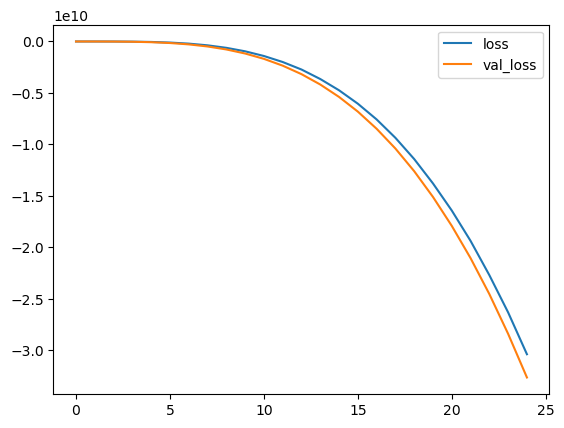

In [13]:
losses = pd.DataFrame(model.history.history)
losses[['loss','val_loss']].plot()


In [14]:
from sklearn.metrics import classification_report,confusion_matrix
predict_x=model.predict(X_test) 
classes_x=np.argmax(predict_x,axis=1)
print(classification_report(y_test,predict_x))


782/782 [==============================] - 0s 552us/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2551
           1       0.10      1.00      0.18      2472
           2       0.00      0.00      0.00      2490
           3       0.00      0.00      0.00      2459
           4       0.00      0.00      0.00      2466
           5       0.00      0.00      0.00      2474
           6       0.00      0.00      0.00      2499
           7       0.00      0.00      0.00      2553
           8       0.00      0.00      0.00      2485
           9       0.00      0.00      0.00      2551

    accuracy                           0.10     25000
   macro avg       0.01      0.10      0.02     25000
weighted avg       0.01      0.10      0.02     25000



D:\Program Files (x86)\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Program Files (x86)\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Program Files (x86)\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Support Vector Machines

In [15]:
from sklearn.svm import SVC
df2=df.head(5000)
X = df2.drop('label',axis=1).values
y = df2['label'].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

svc_model = SVC()
svc_model.fit(X_train,y_train)

SVC()

In [16]:
from sklearn.metrics import classification_report,confusion_matrix

In [17]:
predictions = svc_model.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.49      0.43      0.46       110
           1       0.51      0.43      0.47       102
           2       0.27      0.34      0.30        91
           3       0.22      0.18      0.20        96
           4       0.39      0.44      0.42        93
           5       0.37      0.33      0.35       101
           6       0.39      0.52      0.45        96
           7       0.60      0.46      0.52       103
           8       0.49      0.43      0.46       113
           9       0.45      0.59      0.51        95

    accuracy                           0.41      1000
   macro avg       0.42      0.41      0.41      1000
weighted avg       0.42      0.41      0.41      1000



In [18]:
from sklearn.model_selection import GridSearchCV

In [19]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001]} 
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .....................................C=0.1, gamma=1; total time=  16.6s
[CV] END .....................................C=0.1, gamma=1; total time=  16.3s
[CV] END .....................................C=0.1, gamma=1; total time=  16.5s
[CV] END .....................................C=0.1, gamma=1; total time=  19.5s
[CV] END .....................................C=0.1, gamma=1; total time=  17.3s
[CV] END ...................................C=0.1, gamma=0.1; total time=  17.2s
[CV] END ...................................C=0.1, gamma=0.1; total time=  18.6s
[CV] END ...................................C=0.1, gamma=0.1; total time=  17.6s
[CV] END ...................................C=0.1, gamma=0.1; total time=  16.4s
[CV] END ...................................C=0.1, gamma=0.1; total time=  16.4s
[CV] END ..................................C=0.1, gamma=0.01; total time=  16.2s
[CV] END ..................................C=0.1

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             verbose=2)

In [20]:
grid_predictions = grid.predict(X_test)

In [ ]:
print(classification_report(y_test,grid_predictions))

# Random Forest

In [3]:
X = df.drop('label',axis=1).values
y = df['label'].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=101)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [4]:
from sklearn.tree import DecisionTreeClassifier

In [5]:
dtree = DecisionTreeClassifier()

In [6]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [8]:
predictions = dtree.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.34      0.33      0.33      2551
           1       0.26      0.25      0.26      2472
           2       0.20      0.22      0.21      2490
           3       0.16      0.17      0.17      2459
           4       0.20      0.22      0.21      2466
           5       0.21      0.21      0.21      2474
           6       0.25      0.25      0.25      2499
           7       0.26      0.25      0.25      2553
           8       0.36      0.36      0.36      2485
           9       0.29      0.26      0.28      2551

    accuracy                           0.25     25000
   macro avg       0.25      0.25      0.25     25000
weighted avg       0.25      0.25      0.25     25000



In [11]:
from sklearn.ensemble import RandomForestClassifier

In [12]:
rfc = RandomForestClassifier(n_estimators=600)

In [13]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=600)

In [14]:
predictions = rfc.predict(X_test)

In [15]:
from sklearn.metrics import classification_report,confusion_matrix

In [16]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.55      0.51      0.53      2551
           1       0.50      0.54      0.52      2472
           2       0.41      0.30      0.35      2490
           3       0.37      0.28      0.32      2459
           4       0.38      0.43      0.40      2466
           5       0.41      0.39      0.40      2474
           6       0.44      0.56      0.50      2499
           7       0.53      0.46      0.49      2553
           8       0.57      0.62      0.59      2485
           9       0.47      0.57      0.52      2551

    accuracy                           0.47     25000
   macro avg       0.47      0.47      0.46     25000
weighted avg       0.47      0.47      0.46     25000



In [2]:
import numpy as np

In [4]:
x=np.array([[[1],[2]],[[3],[4]]])
x



array([[[1],
        [2]],

       [[3],
        [4]]])